In [1]:
import io
import requests
import urllib3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
requests.packages.urllib3.disable_warnings()
requests.packages.urllib3.util.ssl_.DEFAULT_CIPHERS += ':HIGH:!DH:!aNULL'
try:
    requests.packages.urllib3.contrib.pyopenssl.util.ssl_.DEFAULT_CIPHERS += ':HIGH:!DH:!aNULL'
except AttributeError:
    # no pyopenssl support used / needed / available
    pass

## See error when not running it in https://stackoverflow.com/questions/38015537/python-requests-exceptions-sslerror-dh-key-too-small

In [3]:
## data home page: https://www.data.gv.at/katalog/dataset/covid-19-schutzimpfungen-impfungen-in-gemeinden

url = "https://info.gesundheitsministerium.gv.at/data/impfungen-gemeinden.csv"

csvfile = requests.get(url, verify=False).content
vaccination = pd.read_csv(io.StringIO(csvfile.decode('utf-8')), sep=";")

In [4]:
vaccination.head()

,Datum,Gemeindecode,Bevölkerung,Teilgeimpfte,TeilgeimpftePro100,Vollimmunisierte,VollimmunisiertePro100
0,2021-11-29T23:59:59+01:00,10101,14895,11335,76.099362,10768,72.292716
1,2021-11-29T23:59:59+01:00,10201,2000,1551,77.550000,1474,73.700000
2,2021-11-29T23:59:59+01:00,10301,1883,1474,78.279341,1421,75.464684
3,2021-11-29T23:59:59+01:00,10302,1841,1455,79.033134,1397,75.882672
4,2021-11-29T23:59:59+01:00,10303,2122,1642,77.379830,1572,74.081056


In [5]:
vaccination.Gemeindecode.unique()

array([10101, 10201, 10301, ..., 92101, 92201, 92301])

In [6]:
vaccination[vaccination["Gemeindecode"] == 10101]

,Datum,Gemeindecode,Bevölkerung,Teilgeimpfte,TeilgeimpftePro100,Vollimmunisierte,VollimmunisiertePro100
0,2021-11-29T23:59:59+01:00,10101,14895,11335,76.099362,10768,72.292716


<AxesSubplot:xlabel='Gemeindecode', ylabel='Vollimmunisierte'>

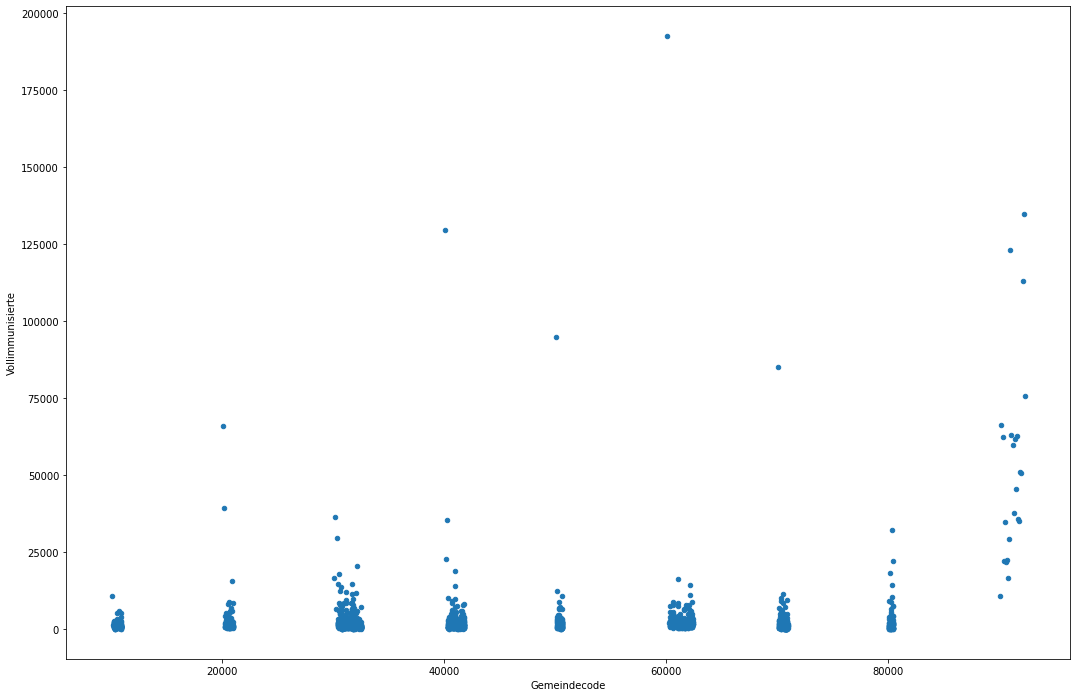

In [12]:
vaccination.plot.scatter(x="Gemeindecode", y="Vollimmunisierte", figsize=(18,12))